In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customers-1.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

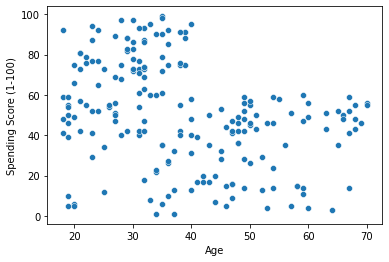

In [5]:
sns.scatterplot(data = df ,x = 'Age',y = 'Spending Score (1-100)' )
plt.show()

In [6]:
X = df.iloc[:,[3,4]].values


Finding Optimal numbers of Clusters
we will see two methods for finding optimal numbers of clusters:
1. Elbow Method

2. Silhouette score**

Let's Start with Elbow Method
# ELBOW METHOD In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ).
WCSS is the sum of squared distance between each point and the centroid in a cluster. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters

In [7]:
from sklearn.cluster import KMeans

In [8]:
# Calculating WCSS
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    

C:\Users\prabh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


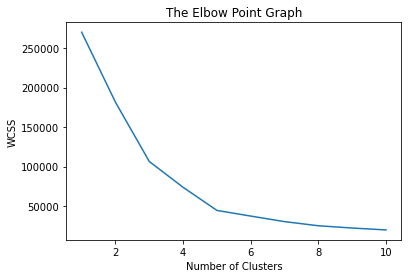

In [9]:
# Plotting Elbow Graph
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

As you can see, the inertia drops very quickly as we increase k up to 5, but then it decreases much more slowly as we keep increasing k. Hence it is the elbow point and optimal number of clusters = 5.

2 - Silhouette Score :-

The silhouette coefficient can vary between –1 and +1. A coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to –1 means that the instance may have been assigned to the wrong cluster.


To compute the silhouette score, you can use Scikit-Learn’s silhouette_score(

In [10]:
from sklearn.metrics import silhouette_score

In [11]:
sc = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    sce = silhouette_score(X,kmeans.labels_)
    sc.append(sce)

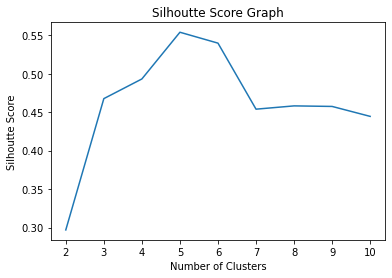

In [12]:
# Plotting Silhoutte graph
# Remember Silhoutte score closest to +1, provides the optimal k value

plt.plot(range(2,11), sc)
plt.title('Silhoutte Score Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Score')
plt.show()


As you can see, K=5 have highest silhoutte score closest to +1 and this visualization is much richer than the previous one.
It confirms the cluster number to 5.